Nome: Thais Lima de Sousa nUSP 8941220

In [6]:
from vpi.io import *
from collections import deque
import numpy as np

# Exercício 6 - P1

## Identificação de tipos de dobradiça de porta

### Infraestrutura física:
<p>Para resolver o problema de separação das dobradiças na linha de produção, as peças devem ser posicionadas individualmente em um mecanismo móvel, como uma esteira, e devem estar sobre uma placa branca enquanto são fotografadas, para que a luz refletida nos buracos da peça sejam capturados com a cor branca na imagem. Mediante a determinação de seu tipo, a peça deve ser desviada para a sua rota correspondente.</p>

### Processamento da imagem:
<p>As regiões de furos das peças têm pixels na cor branca. Os ruídos que ocorrem dentro dos furos estão em níveis de cinza. Portanto, é possível determinar o número de furos a partir da rotulação da imagem pela cor branca, pois será correspondente ao número de componentes conexas da imagem, visto que o ruído não será componente conexa devido à forma de processamento.</p>

In [7]:
def neighbours(f, p):
    list = []
    if p[0] - 1 >= 0:
        list.append((p[0] - 1, p[1]))
    if p[1] - 1 >= 0:
        list.append((p[0], p[1] - 1))
    if p[0] + 1 < f.shape[0]:
        list.append((p[0] + 1, p[1]))
    if p[1] + 1 < f.shape[1]:
        list.append((p[0], p[1] + 1))
    return list

In [8]:
def label(f, colour):
    g = np.zeros(f.shape).astype(int)
    label = 0
    queue = deque()
    for x in range(f.shape[0]):
        for y in range(f.shape[1]):
            p = (x, y)
            
            if (f[p] == colour) & (g[p] == 0):
                queue.append(p)
                label = label + 1
                g[p] = label
                
            while queue:
                r = queue.popleft()
                for s in neighbours(f, r):
                    if (f[s] == colour) & (g[s] == 0):
                        g[s] = label
                        queue.append(s)
    return g

number of holes:


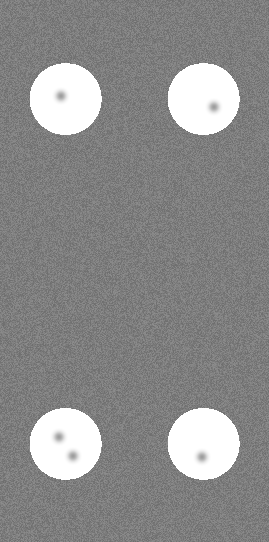

image1:  4


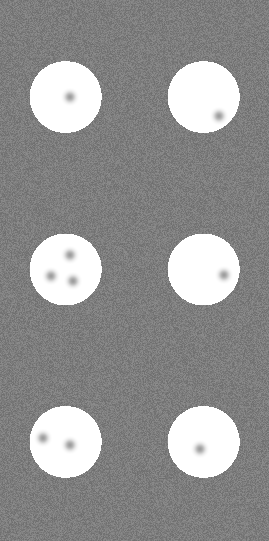

image2:  6


In [9]:
f4 = read_image('filled_dobradica_04_gray_gray.png')
f6 = read_image('filled_dobradica_06_gray_gray.png')

g4 = label(f4, 255)
g6 = label(f6, 255)

print('number of holes:')
display_image(f4)
print('image1: ', g4.max())
display_image(f6)
print('image2: ', g6.max())